<a href="https://colab.research.google.com/github/fagiantz/Tugas-ML-GDCoC-Week3/blob/main/TugasMachineLearning_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Info dari dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/2019.csv')
df.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
df["Country or region"].value_counts()

,count
Country or region,
Finland,1
Venezuela,1
Jordan,1
Benin,1
Congo (Brazzaville),1
...,...
Latvia,1
South Korea,1
Estonia,1


In [ ]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


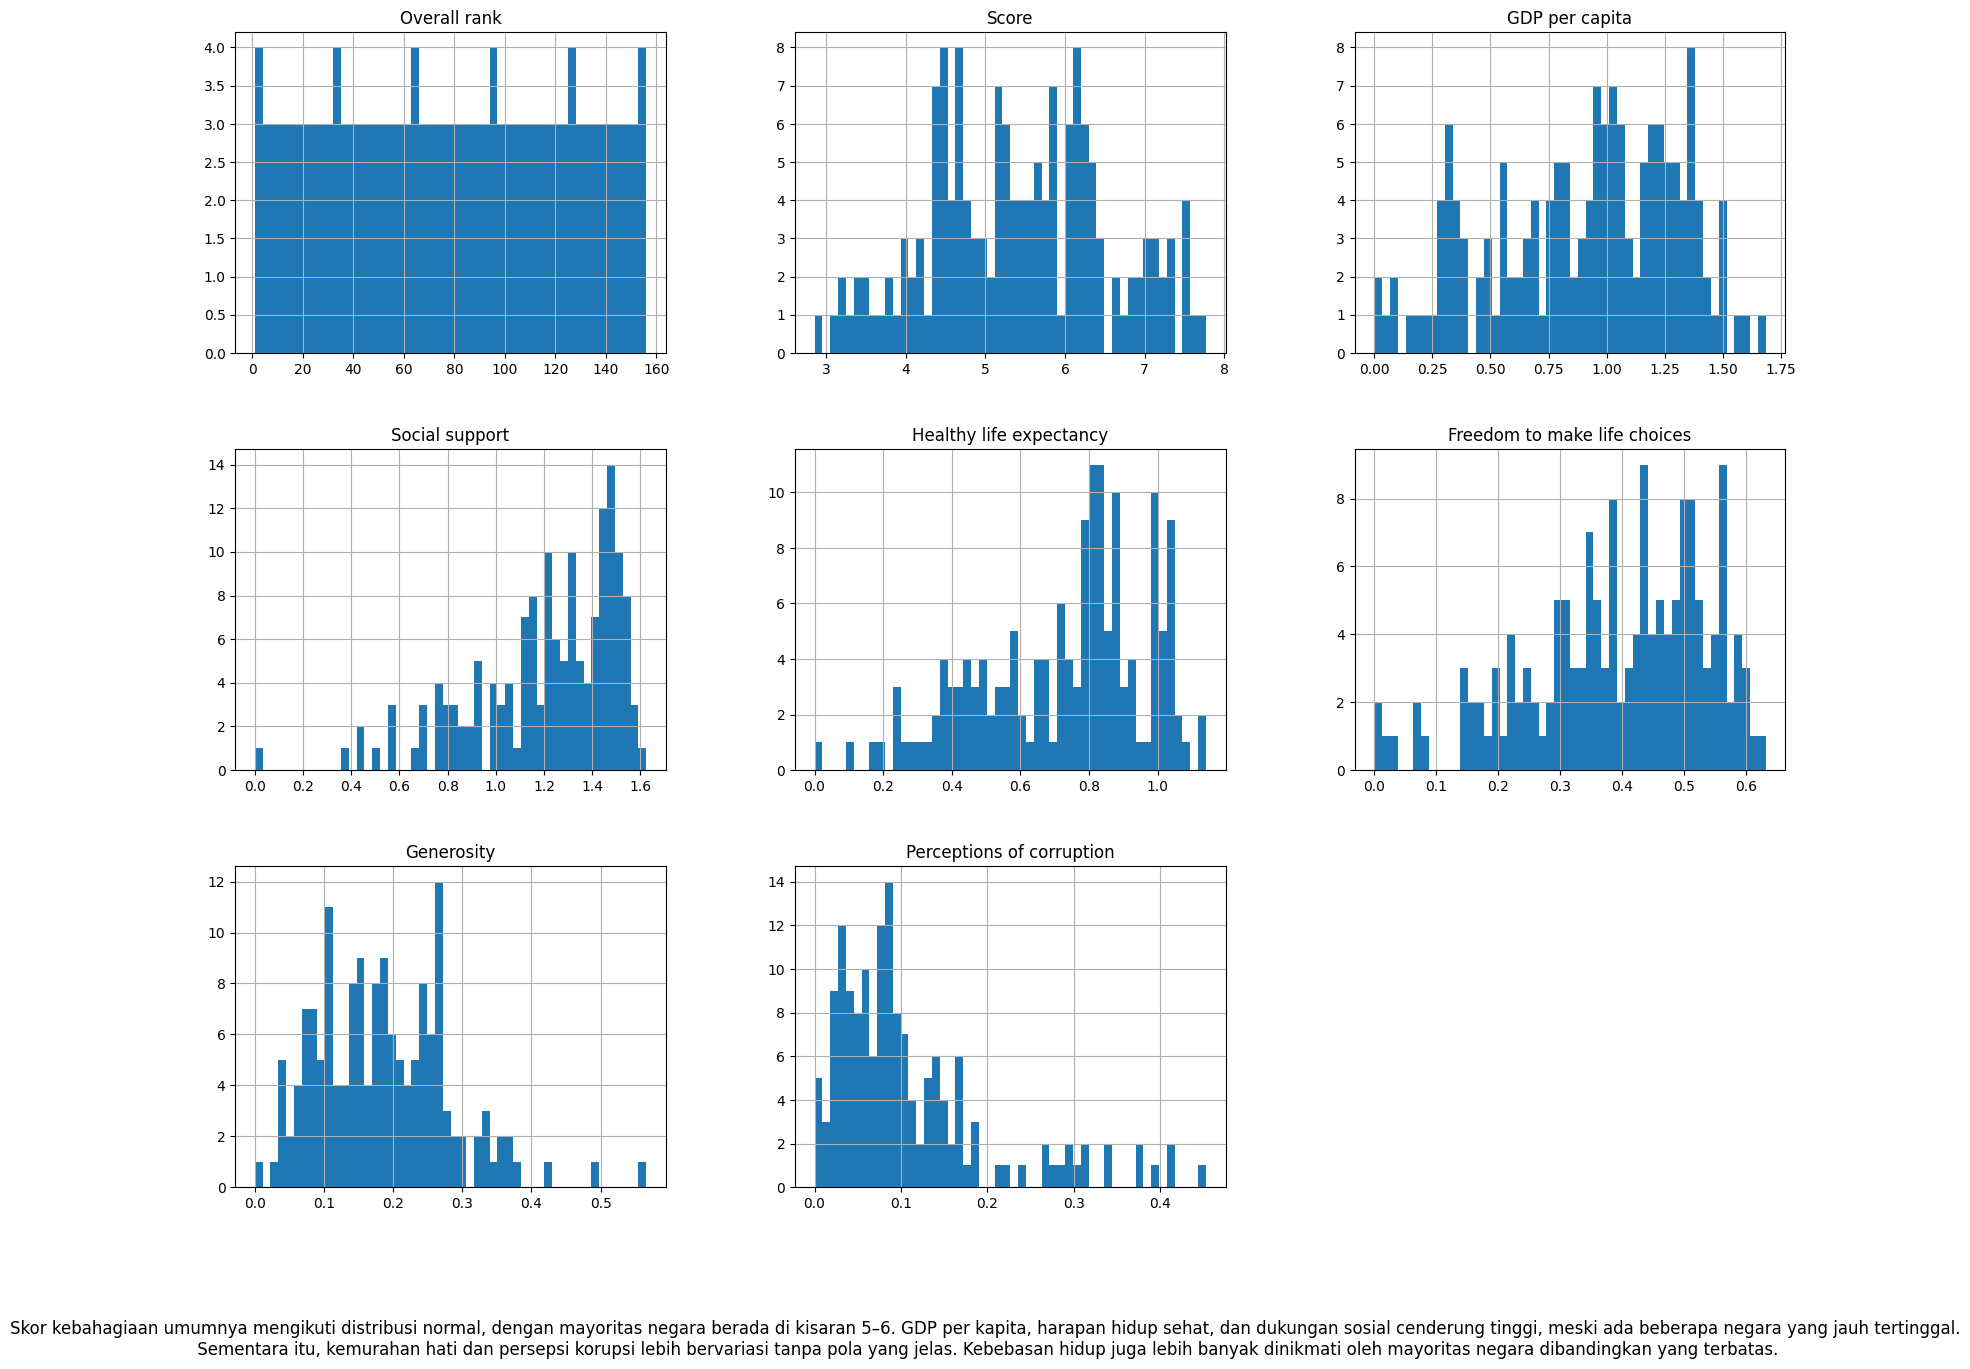

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

plt.figtext(0.5, 0, "Skor kebahagiaan umumnya mengikuti distribusi normal, dengan mayoritas negara berada di kisaran 5–6. GDP per kapita, harapan hidup sehat, dan dukungan sosial cenderung tinggi, meski ada beberapa negara yang jauh tertinggal.\n Sementara itu, kemurahan hati dan persepsi korupsi lebih bervariasi tanpa pola yang jelas. Kebebasan hidup juga lebih banyak dinikmati oleh mayoritas negara dibandingkan yang terbatas.",
            wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

Text(0.5, -0.05, 'Jika dilihat dari scatter plot, angka harapan hidup dan \nGDP per kapita memiliki hubungan korelasi yang positif.')

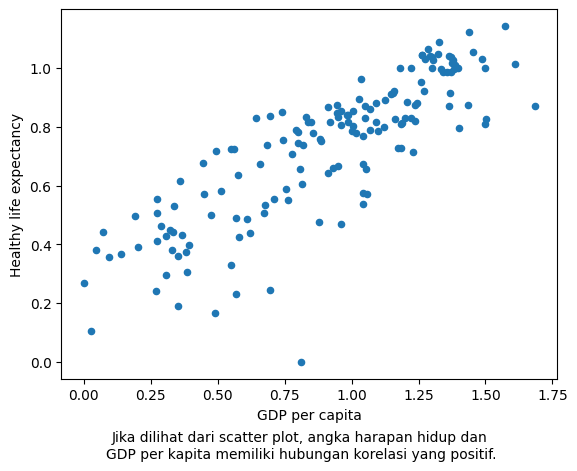

In [ ]:
df.plot(kind="scatter", x="GDP per capita", y="Healthy life expectancy")

plt.figtext(0.5, -0.05, "Jika dilihat dari scatter plot, angka harapan hidup dan \nGDP per kapita memiliki hubungan korelasi yang positif.",
            wrap=True, horizontalalignment='center', fontsize=10)

Text(0.5, -0.05, 'Berikut scatter plot yang sama dengan tingkat alpha yang berbeda ')

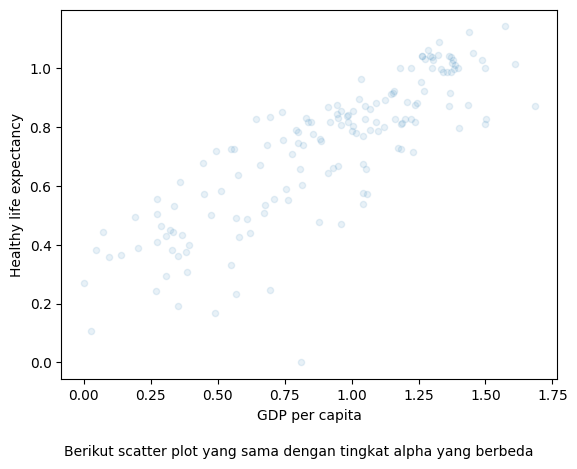

In [ ]:
df.plot(kind="scatter", x="GDP per capita", y="Healthy life expectancy", alpha=0.1)
plt.figtext(0.5, -0.05, "Berikut scatter plot yang sama dengan tingkat alpha yang berbeda ",
            wrap=True, horizontalalignment='center', fontsize=10)

Text(0.5, -0.05, 'Berdasarkan scatter plot ini, semakin tinggi kekayaan \nseseorang, maka tingkat kebahagiaanya makin tinggi. \nNamun tingkat harapan hidup dan kekayaan tidak terlalu berpengaruh pada\n tingkat generosity. ')

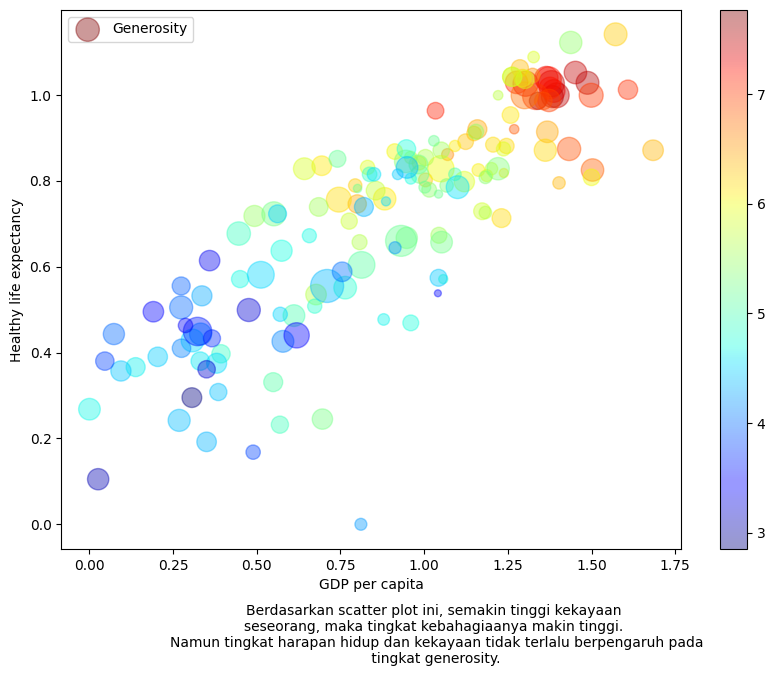

In [ ]:
df.plot(kind="scatter", x="GDP per capita", y="Healthy life expectancy", alpha=0.4,
        s=df["Generosity"] * 1000,
        label="Generosity", figsize=(10,7),
        c=df["Score"], cmap=plt.get_cmap("jet"), colorbar=True,
        sharex=False)


plt.legend()
plt.figtext(0.5, -0.05, "Berdasarkan scatter plot ini, semakin tinggi kekayaan \nseseorang, maka tingkat kebahagiaanya makin tinggi. \nNamun tingkat harapan hidup dan kekayaan tidak terlalu berpengaruh pada\n tingkat generosity. ",
            wrap=True, horizontalalignment='center', fontsize=10)

In [ ]:
corr_matrix = df.select_dtypes(include=['number']).corr()
corr_matrix["Score"].sort_values(ascending=False)

,Score
Score,1.000000
GDP per capita,0.793883
Healthy life expectancy,0.779883
Social support,0.777058
Freedom to make life choices,0.566742
Perceptions of corruption,0.385613
Generosity,0.075824
Overall rank,-0.989096


Text(0.5, -0.05, 'Plot ini menunjukkan hubungan antara GDP per kapita, \n harapan hidup sehat, kemurahan hati, dan skor kebahagiaan. \n Dari plottingan ini dapat kita lihat bahwa mayoritas korelasi dari setiap variabel bernilai positif dan linear ke atas')

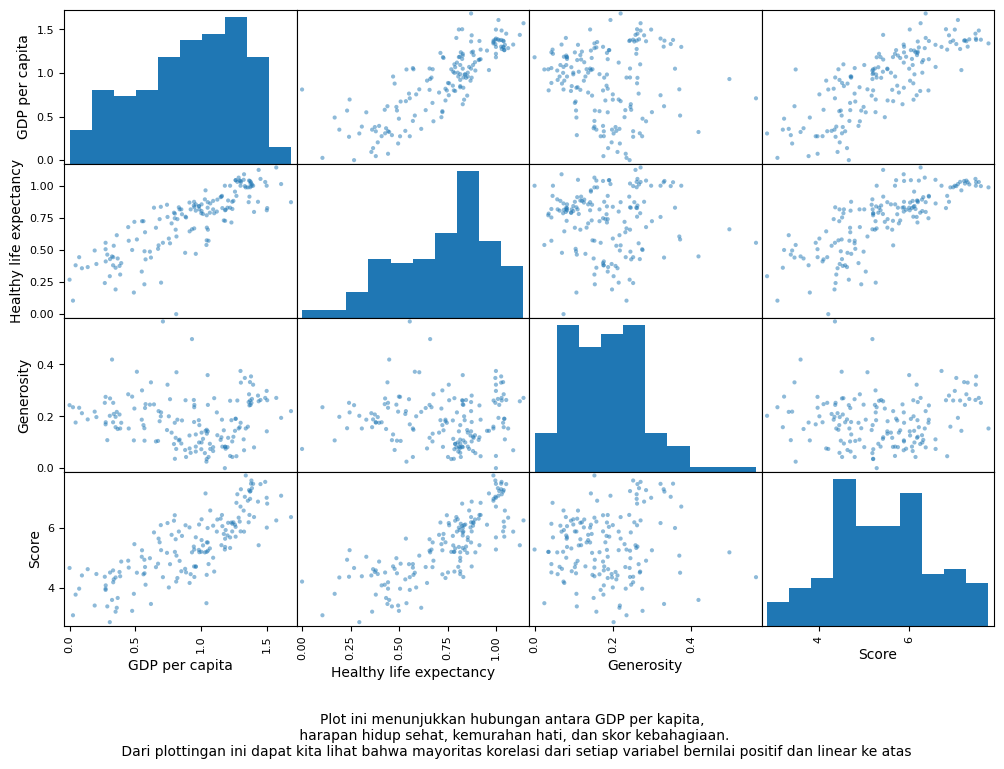

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
attributes = ["GDP per capita", "Healthy life expectancy","Generosity", "Score"]
scatter_matrix(df[attributes], figsize=(12,8))

plt.figtext(0.5, -0.05, "Plot ini menunjukkan hubungan antara GDP per kapita, \n harapan hidup sehat, kemurahan hati, dan skor kebahagiaan. \n Dari plottingan ini dapat kita lihat bahwa mayoritas korelasi dari setiap variabel bernilai positif dan linear ke atas",
            wrap=True, horizontalalignment='center', fontsize=10)